## Q.1 Single Formant Resonator
 
 $F_1 = 900 Hz, B_1 = 200 Hz, F_s = 16 kHz$
 
### Impulse response:
h(t) = A$e^{-B_1\pi t}$sin(2$\pi F_1$t)

T (Sampling Interval) = $\frac{1}{F_s}$

Z-domain poles can be expressed as,
  
$z_{p} = re^{j\theta}$

where, r = $e^{-B_1 \pi T}$ and $\theta$ = $2\pi F_1 T$

### Transfer Function:

H(z) = $\frac{K}{1 - 2rcos\theta z^{-1} + r^{2}z^{-2}}$

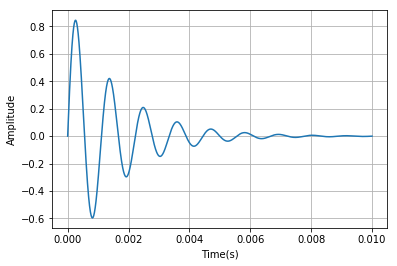

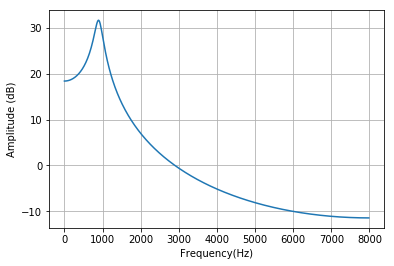

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi
import math
from scipy import signal


F1 = 900
B1 = 200
Fs = 16000
T = 1/Fs

r = np.exp(-B1*pi*T)
theta = 2*pi*F1*T

t = np.linspace(0,0.01,10000)
impulse_response = np.exp(-B1*pi*t)*np.sin(2*pi*F1*t)

plt.figure()
plt.plot(t,impulse_response)
plt.grid()
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.show()

num = [1]
den = [1, -2*r*math.cos(theta), r**2]
freq,tf = signal.freqz(num,den)

plt.figure()
plt.plot(freq*Fs/(2*pi),20*np.log10(abs(tf)))
plt.grid()
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude (dB)')
plt.show()


### Q.2 The above filter is excited by a source of 0.5 seconds impulse train with frequency $F_o$ = 140 Hz.

Number of samples $(S) = 0.5*F_s$

To generate an impulse train an array of length S is set to 1 at array indices which are multiples of $floor(\frac{F_s}{F_o})$, rest all zeros.

### Difference Equation

$y[n] = x[n] + 2rcos(\theta) y[n-1] - r^{2}y[n-2]$

Assuming a causal system, 

$y[-1] = y[-2] = 0$

Recursively solving $y[n]$ for every $n$ gives us the signal for the desired time period. "lfilter" in scipy directly takes in the input signal and operates on it the filter to obtain the output signal.

### Observations
There output sounded like the noise made by cargo ships horn which is low pitched. It seemed to be composed of a single frequency component.

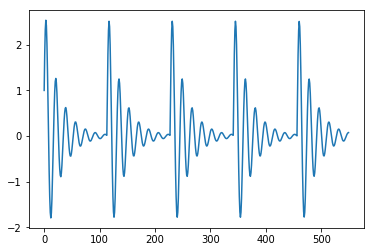

In [23]:

def SingleFormant(F0,F1,B1):

  
  Fs = 16000
  T = 1/Fs

  r = np.exp(-B1*pi*T)
  theta = 2*pi*F1*T

  num = [1]
  den = [1, -2*r*math.cos(theta), r**2]
  
  impulse_train = np.zeros(int(0.5*Fs))
  idx = np.arange(0,0.5*Fs,Fs/F0)
  impulse_train[idx.astype(int)] = 1

  output_signal = signal.lfilter(num,den,impulse_train)

  return output_signal

output_signal = SingleFormant(140,900,200)

plt.figure()
plt.plot(output_signal[0:550])
plt.show()

import IPython as ipy
ipy.display.Audio(output_signal,rate = Fs)


### Q.3 Observations
The $1^{st}$ $\&$ $3^{rd}$ outputs sounded similar in quality apart from the frequency. It is clear that the $3^{rd}$ signal was high pitched as compared to the $1^{st}$ one.

$1^{st}$ and $2^{nd}$ sounds very differently even though they have same source frequency. The $2^{nd}$ sound felt to of higher overtone as compared to the first one. They differ in quality also.

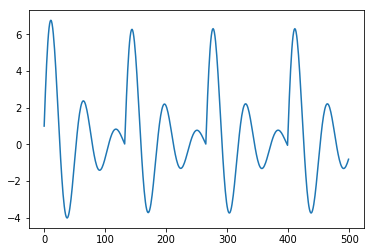

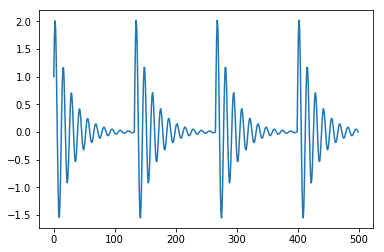

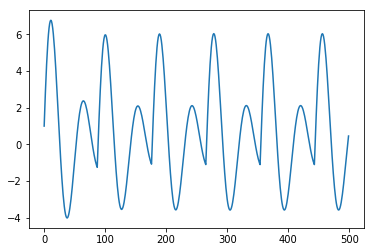

In [24]:
part_a = SingleFormant(120, 300, 100)
part_b = SingleFormant(120, 1200, 200)
part_c = SingleFormant(180, 300, 100)

plt.figure()
plt.plot(part_a[0:500])
plt.figure()
plt.plot(part_b[0:500])
plt.figure()
plt.plot(part_c[0:500])
plt.show()

ipy.display.display(ipy.display.Audio(part_a,rate = Fs))
ipy.display.display(ipy.display.Audio(part_b,rate = Fs))
ipy.display.display(ipy.display.Audio(part_c,rate = Fs))


### Q.4

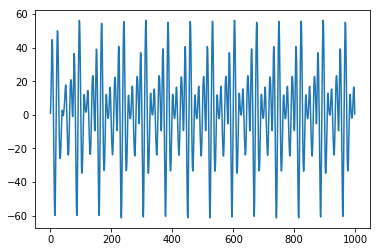

F0 = 120 Hz


F1 = 220 Hz


In [47]:
def VowelProduction(F0, F1, F2, F3, B1, Fs):
  T = 1/Fs
  r = np.exp(-B1*pi*T)
  theta1 = 2*pi*F1*T
  theta2 = 2*pi*F2*T
  theta3 = 2*pi*F3*T
  
  from scipy import signal
  
  filter_coeff = np.array([[1, 0, 0, 1, -2*r*math.cos(theta1), r**2],
                          [1, 0, 0, 1, -2*r*math.cos(theta2), r**2],
                          [1, 0, 0, 1, -2*r*math.cos(theta3), r**2]])
  
  impulse_train = np.zeros(int(0.5*Fs))
  idx = np.arange(0,0.5*Fs,Fs/F0)
  impulse_train[idx.astype(int)] = 1
  
  sound_signal = signal.sosfilt(filter_coeff, impulse_train)
  return sound_signal

sound_a1 = VowelProduction(120, 730, 1090, 2440, 100, 16000)
sound2 = VowelProduction(120, 270, 2290, 3010, 100, 16000)
sound3 = VowelProduction(120, 300, 870, 2240, 100, 16000)

plt.show()
plt.plot(sound1[:1000])
plt.show()

#Sound Player
print("F0 = 120 Hz")
ipy.display.display(ipy.display.Audio(sound_a1,rate = Fs))
ipy.display.display(ipy.display.Audio(sound2,rate = Fs))
ipy.display.display(ipy.display.Audio(sound3,rate = Fs))

sound_a2 = VowelProduction(220, 730, 1090, 2440, 100, 16000)
sound2 = VowelProduction(220, 270, 2290, 3010, 100, 16000)
sound3 = VowelProduction(220, 300, 870, 2240, 100, 16000)

#Sound Player
print("F1 = 220 Hz")
ipy.display.display(ipy.display.Audio(sound_a2,rate = Fs))
ipy.display.display(ipy.display.Audio(sound2,rate = Fs))
ipy.display.display(ipy.display.Audio(sound3,rate = Fs))

/a/ sound at Fo = 120 Hz


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


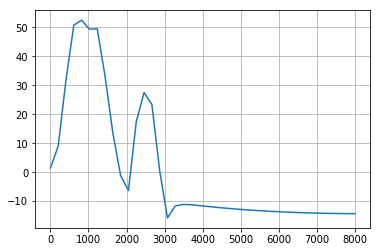

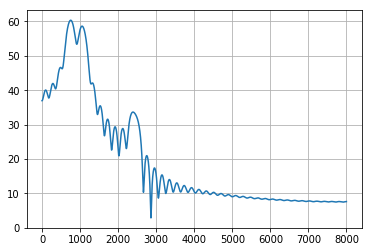

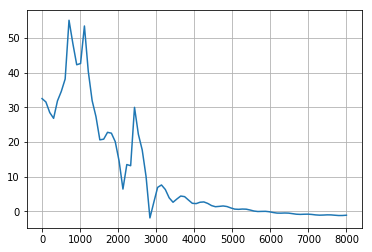

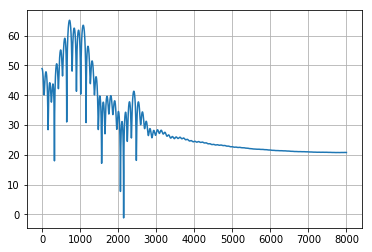

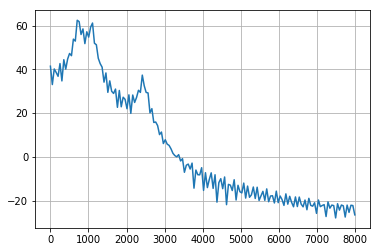

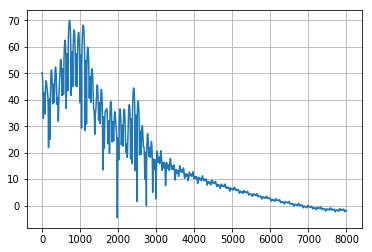

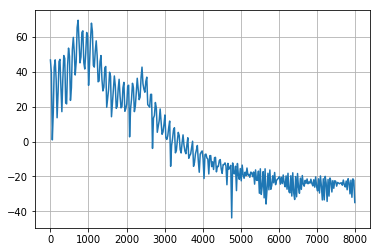

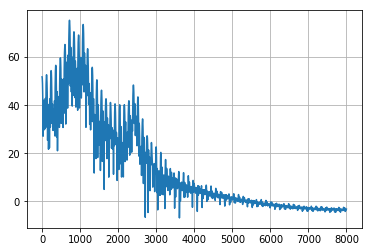

/a/ sound at Fo = 220 Hz


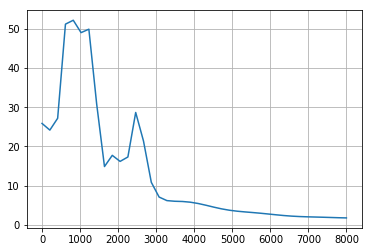

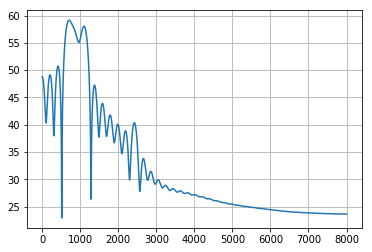

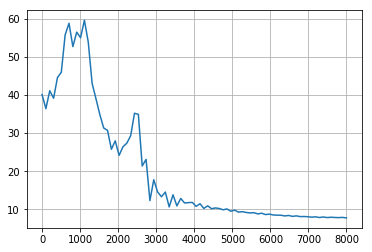

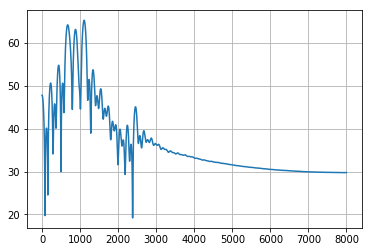

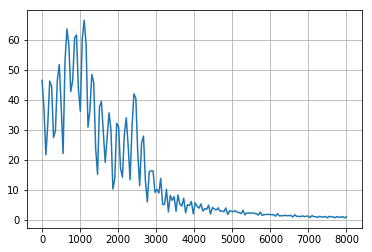

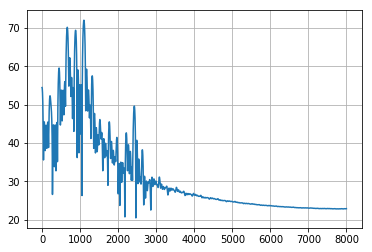

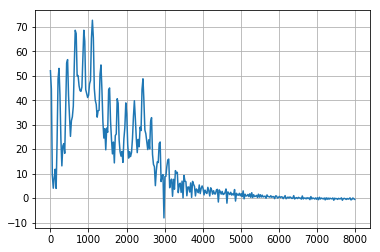

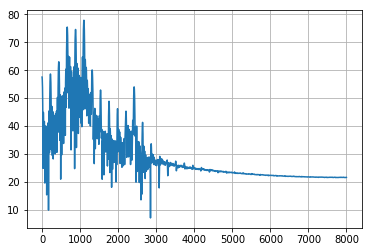

In [48]:
def FFT(window_size, signal, Fs):  
  hamming_window = np.hamming(int(window_size*Fs/1000))

  rect_window = np.zeros(len(signal))
  rect_window[:int(window_size*Fs/1000)] = 1

  from scipy.fftpack import fft
  fft1 = fft(signal[0:int(window_size*Fs/1000)]* hamming_window)
  freq1 = np.linspace(0,Fs/2, int(window_size*Fs/2000))

  fft2 = fft(signal* rect_window)
  freq2 = np.linspace(0,Fs/2, len(signal)/2)
  
  plt.figure()
  plt.plot(freq1,20*np.log10(abs(fft1[0:int(len(fft1)/2)])))
  plt.grid()
  plt.show()
 

  plt.figure()
  plt.plot(freq2,20*np.log10(abs(fft2[0:int(len(fft2)/2)])))
  plt.grid()
  plt.show()

  
  return


print("/a/ sound at Fo = 120 Hz")

FFT(5,sound_a1, Fs)
FFT(10,sound_a1, Fs)
FFT(20,sound_a1, Fs)
FFT(40,sound_a1, Fs)

print("/a/ sound at Fo = 220 Hz")

FFT(5,sound_a2, Fs)
FFT(10,sound_a2, Fs)
FFT(20,sound_a2, Fs)
FFT(40,sound_a2, Fs)



### (i) As the window length is increased the ringing in the frequency response can be seen. Better time resolution leads to distortion in the frequency domain.
### The dominant harmonics are same with both the windows. The area under the FFt is more in hamming window as compared to with rentangular window.

### (ii) Estimated harmonics for /a/ ($F_o$ = 120 Hz) : 700, 1100, 2400 Hz and for /a/ ($F_o$ = 220 Hz) : 700, 1050, 2350 Hz. These features don't change very much with changing the window size.